                                           Evolent Beer Case Study

In [346]:
import pandas as pd
import numpy as np

In [347]:
df = pd.read_csv("C://Users//91971//Downloads//BeerDataScienceProject//BeerDataScienceProject.csv",encoding = 'latin-1')

In [348]:
df 

beer_ABV  beer_beerId  beer_brewerId               beer_name  \
0            5.0        47986          10325            Sausa Weizen   
1            6.2        48213          10325                Red Moon   
2            6.5        48215          10325  Black Horse Black Beer   
3            5.0        47969          10325              Sausa Pils   
4            7.7        64883           1075           Cauldron DIPA   
...          ...          ...            ...                     ...   
528865       NaN         4032           3340       Dinkel Acker Dark   
528866       NaN         4032           3340       Dinkel Acker Dark   
528867       NaN         4032           3340       Dinkel Acker Dark   
528868       NaN         4032           3340       Dinkel Acker Dark   
528869       NaN         4032           3340       Dinkel Acker Dark   

                            beer_style  review_appearance  review_palette  \
0                           Hefeweizen                2.5             2.0   
1                   English Strong Ale                3.0             2.5   
2               Foreign / Export Stout                3.0             2.5   
3                      German Pilsener                3.5             3.0   
4       American Double / Imperial IPA                4.0             4.5   
...                                ...                ...             ...   
528865             Munich Dunkel Lager                4.0             3.0   
528866             Munich Dunkel Lager                4.0             3.5   
528867             Munich Dunkel Lager                4.0             4.0   
528868             Munich Dunkel Lager                4.0             3.0   
528869             Munich Dunkel Lager                4.0             4.0   

        review_overall  review_taste review_profileName  review_aroma  \
0                  1.5           1.5            stcules           1.5   
1                  3.0           3.0            stcules           3.0   
2                  3.0           3.0            stcules           3.0   
3                  3.0           2.5            stcules           3.0   
4                  4.0           4.0     johnmichaelsen           4.5   
...                ...           ...                ...           ...   
528865             4.0           3.5    orangemoustache           4.0   
528866             3.0           3.0        MisterStout           3.0   
528867             4.5           4.0            meechum           4.5   
528868             4.0           4.0          Dodo2step           4.5   
528869             4.0           4.0         jenbys2001           4.0   

                                              review_text  review_time  
0       A lot of foam. But a lot. In the smell some ba...   1234817823  
1       Dark red color, light beige foam, average. In ...   1235915097  
2       Almost totally black. Beige foam, quite compac...   1235916604  
3       Golden yellow color. White, compact foam, quit...   1234725145  
4       According to the website, the style for the Ca...   1293735206  
...                                                   ...          ...  
528865  A-pours a reddish amber that looks very nice,l...   1205212721  
528866  I don't really have anything special to say ab...   1203490783  
528867  Had this on tap at Vreny's Beirgarten A - Came...   1201320897  
528868  Purchased at Market Cross Pub in carlisle, PA....   1201215290  
528869  I ordered a mug of this beer at Schnitzelhaus,...   1200336367  

[528870 rows x 13 columns]

In [349]:
#checking dataframe columns
df.columns

Index(['beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name', 'beer_style',
       'review_appearance', 'review_palette', 'review_overall', 'review_taste',
       'review_profileName', 'review_aroma', 'review_text', 'review_time'],
      dtype='object')

In [350]:
df.duplicated().sum()
#no duplicates are present

0

In [351]:
df.nunique()

beer_ABV                 283
beer_beerId            20200
beer_brewerId           1803
beer_name              18339
beer_style               104
review_appearance         10
review_palette             9
review_overall            10
review_taste               9
review_profileName     22800
review_aroma               9
review_text           528371
review_time           527927
dtype: int64

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


In [353]:

df.isna().sum()
#beer_ABV,review_profileName and review_text have null values

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
dtype: int64

In [354]:
#calculating mean for beer_ABV to replace null values with mean
df.beer_ABV.mean()

7.017441593423365

In [355]:
#replacing beer_ABV null values with mean
df["beer_ABV"] = df.beer_ABV.fillna(df.beer_ABV.mean())

In [356]:
#now beer_ABV do not have any null values
df.isna().sum()

beer_ABV                0
beer_beerId             0
beer_brewerId           0
beer_name               0
beer_style              0
review_appearance       0
review_palette          0
review_overall          0
review_taste            0
review_profileName    115
review_aroma            0
review_text           119
review_time             0
dtype: int64

In [357]:
#dropping all the others rows which have null values because we cannot take mean or mode of review_profileName or review_text
print(len(df.dropna()))
df = df.dropna()

528636


In [358]:
#all the rows which had null values are dropped.
df.isna().sum()

beer_ABV              0
beer_beerId           0
beer_brewerId         0
beer_name             0
beer_style            0
review_appearance     0
review_palette        0
review_overall        0
review_taste          0
review_profileName    0
review_aroma          0
review_text           0
review_time           0
dtype: int64

In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528636 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            528636 non-null  float64
 1   beer_beerId         528636 non-null  int64  
 2   beer_brewerId       528636 non-null  int64  
 3   beer_name           528636 non-null  object 
 4   beer_style          528636 non-null  object 
 5   review_appearance   528636 non-null  float64
 6   review_palette      528636 non-null  float64
 7   review_overall      528636 non-null  float64
 8   review_taste        528636 non-null  float64
 9   review_profileName  528636 non-null  object 
 10  review_aroma        528636 non-null  float64
 11  review_text         528636 non-null  object 
 12  review_time         528636 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 56.5+ MB


In [360]:
#checking the number of rows and columns
df.shape

(528636, 13)

In [361]:
#removing the duplicate data in case one user has given rating many times

In [362]:
before_duplicate_removal = len(df.index)
before_duplicate_removal 

528636

In [363]:
# Keep the highest rating from each user and drop the rest to avoid duplicate user
df = df.drop_duplicates(subset=['review_profileName', 'beer_name'], keep='first')
after_duplicate_removal = len(df.index)
after_duplicate_removal 

522701

In [364]:
df.review_overall.value_counts()

4.0    194247
4.5    109328
3.5     97921
3.0     53229
5.0     30500
2.5     18379
2.0     11855
1.5      3964
1.0      3275
0.0         3
Name: review_overall, dtype: int64

In [365]:
#removing any rows which had the review rating less than 1 and more than 5
df = df[( (df['review_overall'] >= 1) | (df['review_overall'] <=5) ) |
        ( (df['review_palette'] >= 1) | (df['review_palette'] <=5) ) |
        ( (df['review_appearance'] >= 1) | (df['review_appearance'] <= 5) ) |
        ( (df['review_taste'] >= 1) | (df['review_taste'] <=5) ) |
        ( (df['review_aroma'] >= 1) | (df['review_aroma'] <=5) ) ]
print(len(df))


522701


Data Analysis

In [366]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

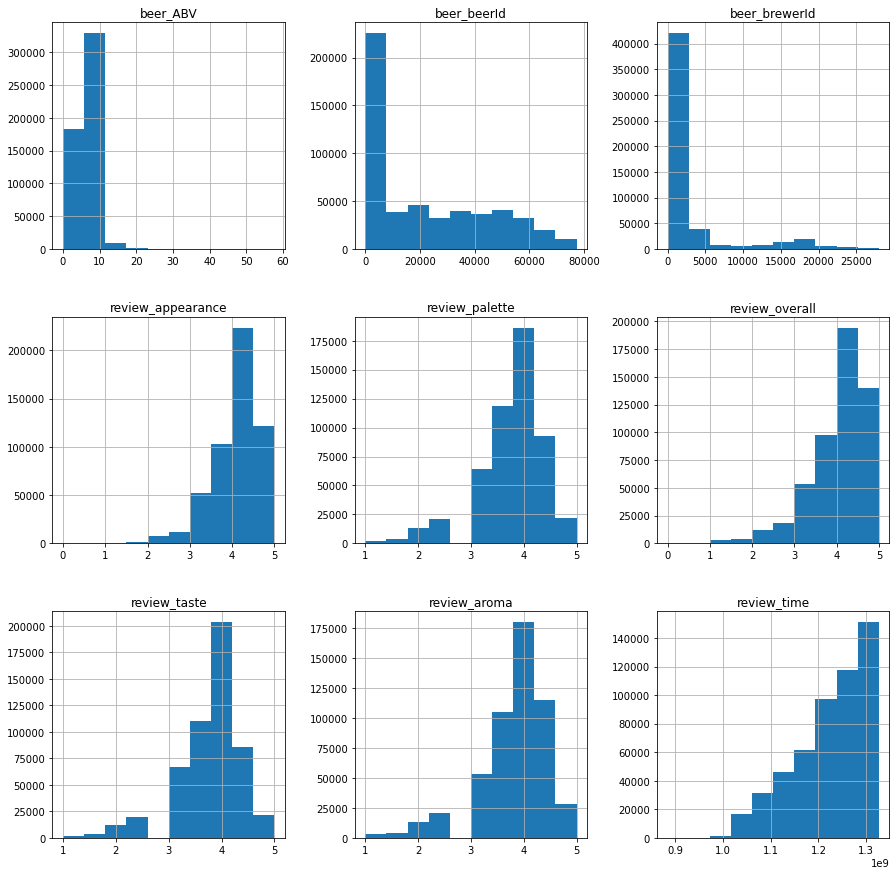

In [367]:
df.hist(figsize=(15,15))
plt.show()

<AxesSubplot:title={'center':'Popular Beers by Style'}>

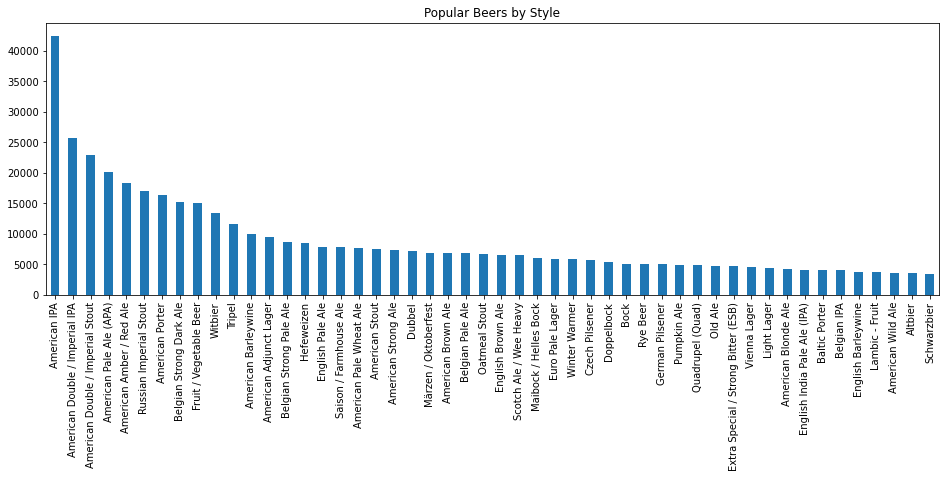

In [368]:
#Beer style-Types of beer

df['beer_style'].value_counts().head(50).plot.bar(figsize=(16,5),title= 'Popular Beers by Style')

Questions

Q1)  Rank top 3 Breweries which produce the strongest beers?

In [369]:
avg_abv = df.groupby(['beer_brewerId'])['beer_ABV'].mean()
top3 = pd.DataFrame(avg_abv)
top3 = top3.sort_values(by=['beer_ABV'], ascending=False)[:3]
top3

beer_ABV
beer_brewerId           
6513           19.228824
736            13.395655
24215          12.466667

<AxesSubplot:xlabel='beer_brewerId'>

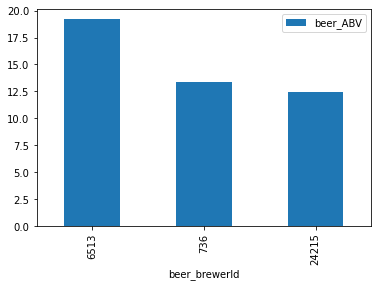

In [370]:
#bar graph for the top 3 brewer
top3.plot(kind='bar') 
           


So Breweries which produces the strongest beers are -

6513,

736 and

24215

Q2) Which year did beers enjoy the highest ratings?

In [371]:
df['review_time'].dtypes

dtype('int64')

In [372]:
#converting review time in form of year
review_year=pd.to_datetime(df['review_time'], unit='s')


In [373]:
review_year

0        2009-02-16 20:57:03
1        2009-03-01 13:44:57
2        2009-03-01 14:10:04
3        2009-02-15 19:12:25
4        2010-12-30 18:53:26
                 ...        
528865   2008-03-11 05:18:41
528866   2008-02-20 06:59:43
528867   2008-01-26 04:14:57
528868   2008-01-24 22:54:50
528869   2008-01-14 18:46:07
Name: review_time, Length: 522701, dtype: datetime64[ns]

In [374]:
df['review_year']=pd.DatetimeIndex(review_year).year

In [375]:
df

beer_ABV  beer_beerId  beer_brewerId               beer_name  \
0       5.000000        47986          10325            Sausa Weizen   
1       6.200000        48213          10325                Red Moon   
2       6.500000        48215          10325  Black Horse Black Beer   
3       5.000000        47969          10325              Sausa Pils   
4       7.700000        64883           1075           Cauldron DIPA   
...          ...          ...            ...                     ...   
528865  7.017442         4032           3340       Dinkel Acker Dark   
528866  7.017442         4032           3340       Dinkel Acker Dark   
528867  7.017442         4032           3340       Dinkel Acker Dark   
528868  7.017442         4032           3340       Dinkel Acker Dark   
528869  7.017442         4032           3340       Dinkel Acker Dark   

                            beer_style  review_appearance  review_palette  \
0                           Hefeweizen                2.5             2.0   
1                   English Strong Ale                3.0             2.5   
2               Foreign / Export Stout                3.0             2.5   
3                      German Pilsener                3.5             3.0   
4       American Double / Imperial IPA                4.0             4.5   
...                                ...                ...             ...   
528865             Munich Dunkel Lager                4.0             3.0   
528866             Munich Dunkel Lager                4.0             3.5   
528867             Munich Dunkel Lager                4.0             4.0   
528868             Munich Dunkel Lager                4.0             3.0   
528869             Munich Dunkel Lager                4.0             4.0   

        review_overall  review_taste review_profileName  review_aroma  \
0                  1.5           1.5            stcules           1.5   
1                  3.0           3.0            stcules           3.0   
2                  3.0           3.0            stcules           3.0   
3                  3.0           2.5            stcules           3.0   
4                  4.0           4.0     johnmichaelsen           4.5   
...                ...           ...                ...           ...   
528865             4.0           3.5    orangemoustache           4.0   
528866             3.0           3.0        MisterStout           3.0   
528867             4.5           4.0            meechum           4.5   
528868             4.0           4.0          Dodo2step           4.5   
528869             4.0           4.0         jenbys2001           4.0   

                                              review_text  review_time  \
0       A lot of foam. But a lot. In the smell some ba...   1234817823   
1       Dark red color, light beige foam, average. In ...   1235915097   
2       Almost totally black. Beige foam, quite compac...   1235916604   
3       Golden yellow color. White, compact foam, quit...   1234725145   
4       According to the website, the style for the Ca...   1293735206   
...                                                   ...          ...   
528865  A-pours a reddish amber that looks very nice,l...   1205212721   
528866  I don't really have anything special to say ab...   1203490783   
528867  Had this on tap at Vreny's Beirgarten A - Came...   1201320897   
528868  Purchased at Market Cross Pub in carlisle, PA....   1201215290   
528869  I ordered a mug of this beer at Schnitzelhaus,...   1200336367   

        review_year  
0              2009  
1              2009  
2              2009  
3              2009  
4              2010  
...             ...  
528865         2008  
528866         2008  
528867         2008  
528868         2008  
528869         2008  

[522701 rows x 14 columns]

In [376]:
#checking unique review year values-
df['review_year'].unique()

array([2009, 2010, 2012, 2011, 2004, 2003, 2008, 2007, 2006, 2005, 2002,
       2001, 2000, 1999, 1998], dtype=int64)

In [377]:
df_date = df.loc[:,['review_year','review_overall']]
df_date

review_year  review_overall
0              2009             1.5
1              2009             3.0
2              2009             3.0
3              2009             3.0
4              2010             4.0
...             ...             ...
528865         2008             4.0
528866         2008             3.0
528867         2008             4.5
528868         2008             4.0
528869         2008             4.0

[522701 rows x 2 columns]

In [383]:
review_year_group = df_date.groupby('review_year')[['review_overall']].mean().sort_values('review_overall',ascending = False).reset_index()
review_year_group

review_year  review_overall
0          2000        4.187500
1          1999        3.978261
2          2001        3.927844
3          1998        3.891304
4          2010        3.864747
5          2009        3.862567
6          2008        3.831696
7          2005        3.830742
8          2012        3.828702
9          2011        3.827140
10         2007        3.806905
11         2002        3.797672
12         2006        3.796503
13         2004        3.791458
14         2003        3.751180

<AxesSubplot:xlabel='review_year'>

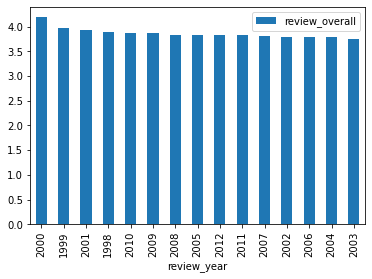

In [384]:
review_year_group.plot(kind='bar',x = 'review_year',y = 'review_overall') 

Q3) Based on the user's ratings which factors are important among taste,aroma,appearance and palette ?

In [385]:
df_features = df[['review_overall','review_taste','review_aroma','review_appearance','review_palette']]
df_features 

review_overall  review_taste  review_aroma  review_appearance  \
0                  1.5           1.5           1.5                2.5   
1                  3.0           3.0           3.0                3.0   
2                  3.0           3.0           3.0                3.0   
3                  3.0           2.5           3.0                3.5   
4                  4.0           4.0           4.5                4.0   
...                ...           ...           ...                ...   
528865             4.0           3.5           4.0                4.0   
528866             3.0           3.0           3.0                4.0   
528867             4.5           4.0           4.5                4.0   
528868             4.0           4.0           4.5                4.0   
528869             4.0           4.0           4.0                4.0   

        review_palette  
0                  2.0  
1                  2.5  
2                  2.5  
3                  3.0  
4                  4.5  
...                ...  
528865             3.0  
528866             3.5  
528867             4.0  
528868             3.0  
528869             4.0  

[522701 rows x 5 columns]

In [386]:
features_corr = df_features.corr()
features_corr

review_overall  review_taste  review_aroma  \
review_overall           1.000000      0.692363      0.783205   
review_taste             0.692363      1.000000      0.725004   
review_aroma             0.783205      0.725004      1.000000   
review_appearance        0.486603      0.554385      0.533816   
review_palette           0.602030      0.603777      0.705820   

                   review_appearance  review_palette  
review_overall              0.486603        0.602030  
review_taste                0.554385        0.603777  
review_aroma                0.533816        0.705820  
review_appearance           1.000000        0.547271  
review_palette              0.547271        1.000000

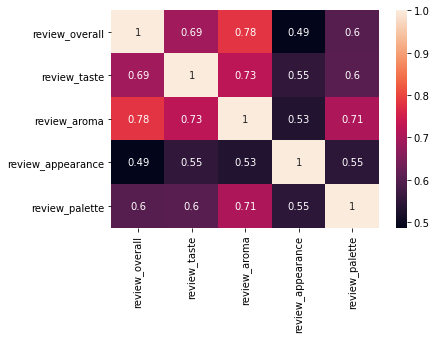

In [387]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(features_corr, annot=True)
plt.show()

In [388]:
#aroma has the highest corelation with overall so this means it is an important feature based on user's ratings

Q4) If you were to recommend 3 beers to your friends based on this data which ones will you recommend?

In [389]:
#Q4
df.groupby('beer_name')['beer_name'].count().sort_values(ascending=False)

beer_name
Sierra Nevada Celebration Ale                 2928
Sierra Nevada Pale Ale                        2525
La Fin Du Monde                               2477
Sierra Nevada Bigfoot Barleywine Style Ale    2443
Founders Breakfast Stout                      2443
                                              ... 
Steel Wheels ESB                                 1
Steel Town Brown                                 1
Hale's Morning Glory Chai Brown                  1
Steel City Steam                                 1
"100" Pale Ale                                   1
Name: beer_name, Length: 18339, dtype: int64

In [390]:
df_recommend = df.loc[:,['beer_name','review_overall','beer_ABV']]
df_recommend

beer_name  review_overall  beer_ABV
0                 Sausa Weizen             1.5  5.000000
1                     Red Moon             3.0  6.200000
2       Black Horse Black Beer             3.0  6.500000
3                   Sausa Pils             3.0  5.000000
4                Cauldron DIPA             4.0  7.700000
...                        ...             ...       ...
528865       Dinkel Acker Dark             4.0  7.017442
528866       Dinkel Acker Dark             3.0  7.017442
528867       Dinkel Acker Dark             4.5  7.017442
528868       Dinkel Acker Dark             4.0  7.017442
528869       Dinkel Acker Dark             4.0  7.017442

[522701 rows x 3 columns]

In [391]:
df_recommend.groupby('beer_name')['review_overall','beer_ABV'].mean().reset_index().sort_values(by = ['review_overall','beer_ABV'],ascending = False).head(10)


beer_name  review_overall  \
582                   AleSmith Speedway Stout - Oak Aged             5.0   
12616  Pilot Series Imperial Sweet Stout - Palm Ridge...             5.0   
1764                               Bees Knees Barleywine             5.0   
3455                                Calapooia Barleywine             5.0   
11013                                      Mother Pucker             5.0   
11466                                    Nine Tailed Fox             5.0   
10077                             Love Child Belgiweizen             5.0   
11308                                      New World IPA             5.0   
15754                      Strongman Belgian Strong Dark             5.0   
1444                              Barley Wine Yeast Beer             5.0   

       beer_ABV  
582        12.0  
12616      12.0  
1764       11.2  
3455       11.0  
11013      11.0  
11466      11.0  
10077      10.4  
11308      10.3  
15754      10.3  
1444       10.0

So based on the data the top 3 beer that are to be recommended are -
1) AleSmith Speedway Stout - Oak Aged


2) Pilot Series Imperial Sweet Stout


3) Bees Knees Barleywine

Q5) Which Beer Style seems to be the favourite based on reviews written by users?

In [474]:
#Q5
df_reviews = df.loc[:,['beer_style','review_text','review_overall']].sort_values(by='beer_style')


In [475]:
df_reviews.head()

beer_style                                        review_text  \
25796    Altbier  from notes. bottle into goblet. clear copper, ...   
47559    Altbier  enjoyed this beer, especially during the fall ...   
77726    Altbier  pour produced an amber colored body. miniscule...   
53700    Altbier  on tap at the national hotel in miami, fl. imp...   
11270    Altbier  12 oz. bottle with 021308 (production date?) o...   

       review_overall  
25796               3  
47559               4  
77726               2  
53700               4  
11270               4

In [476]:
df_reviews.groupby('beer_style')['review_text'].count().nlargest(10)

beer_style
American IPA                        8030
American Double / Imperial IPA      4953
American Double / Imperial Stout    4333
American Pale Ale (APA)             3903
American Amber / Red Ale            3520
Russian Imperial Stout              3304
American Porter                     3122
Fruit / Vegetable Beer              2941
Belgian Strong Dark Ale             2853
Witbier                             2593
Name: review_text, dtype: int64

In [477]:
import  textblob
from textblob import TextBlob

In [478]:
#convert to lowercase
df_reviews['review_text'] = df_reviews['review_text'].apply(lambda x: x.lower()) 

In [479]:
#nlp
import string
import re

In [480]:
#pre process data 
def preprocess(text):
    text = text.replace("(<br/>)", " ")
    text = text.replace("(&amp)", " ")
    text = text.replace("(&gt)", " ")
    text = text.replace("(&lt)", " ")
    text = text.replace("(\xa0)", " ")
    text = text.str.lower()
    text = text.str.strip()
    text = text.replace('\n'," ")
    text = text.str.replace("/", " ")
    text = text.str.replace("!", " ")
    text = text.str.replace(".", " ")
    text = text.str.replace("-", " ")
    text = text.str.replace(",", " ")
    
    
    return (text)

df_reviews['review_text1'] = preprocess(df_reviews['review_text'])

In [481]:
df_reviews['sentiment'] = df_reviews['review_text1'].map(lambda x:TextBlob(x).sentiment.polarity)

In [482]:
df_reviews.drop('review_text',axis=1,inplace= True)

In [483]:
df_reviews

beer_style  review_overall  \
25796    Altbier               3   
47559    Altbier               4   
77726    Altbier               2   
53700    Altbier               4   
11270    Altbier               4   
...          ...             ...   
39999    Witbier               3   
56624    Witbier               3   
81672    Witbier               5   
96472    Witbier               4   
89197    Witbier               4   

                                            review_text1  sentiment  
25796  from notes  bottle into goblet  clear copper  ...  -0.038258  
47559  enjoyed this beer  especially during the fall ...   0.214903  
77726  pour produced an amber colored body  miniscule...  -0.007143  
53700  on tap at the national hotel in miami  fl  imp...   0.027652  
11270  12 oz  bottle with 021308 (production date?) o...   0.240208  
...                                                  ...        ...  
39999  poured a nice slightly cloudy orange yellow wi...   0.294792  
56624  pours a pale  hazy  honey  tight  sticky  whit...   0.125844  
81672  appearance: light yellow to almost white  pour...   0.271944  
96472  this beer was clear  yellow  and well carbonat...   0.155278  
89197  i couldn't drink this all day  but i enjoy it ...   0.310000  

[100000 rows x 4 columns]

In [484]:
df_reviews.sort_values(by='sentiment',ascending=False)

beer_style  review_overall  \
16711                     Winter Warmer               4   
62421                  Quadrupel (Quad)               4   
97510              Märzen / Oktoberfest               3   
77219  American Double / Imperial Stout               5   
92202          American Amber / Red Ale               5   
...                                 ...             ...   
99847                          Rye Beer               4   
33699            American Adjunct Lager               1   
66720                       Light Lager               1   
76809                       Light Lager               2   
29569                      American IPA               1   

                                            review_text1  sentiment  
16711  another review from the sam adams winter varie...   1.000000  
62421  the best beer i've ever got my hands on  the p...   0.866667  
97510  a truly excellent version of the marzen style ...   0.860000  
77219  the class v stout from the kern river brewing ...   0.802857  
92202  what a fantastic beer  a great mix of warrior ...   0.800000  
...                                                  ...        ...  
99847  aaah  enfin  les bires dieu du ciel sont dispo...  -0.500000  
33699  bought a 12 pack at jungle jims for $3 99  i s...  -0.525198  
66720  appearance  not impressed  smell  no good  tas...  -0.543750  
76809  0 5 l bottle  bought in a lidl  superpale yell...  -0.675000  
29569  12oz bottle served in a nonic pint glass a   i...  -0.700000  

[100000 rows x 4 columns]

In [485]:
df_reviews.sort_values(by='sentiment',ascending=False).head(10)

beer_style  review_overall  \
16711                     Winter Warmer               4   
62421                  Quadrupel (Quad)               4   
97510              Märzen / Oktoberfest               3   
77219  American Double / Imperial Stout               5   
92202          American Amber / Red Ale               5   
10576                      American IPA               3   
99273                      American IPA               5   
74369              Märzen / Oktoberfest               4   
80429            Scotch Ale / Wee Heavy               4   
83499            Scotch Ale / Wee Heavy               5   

                                            review_text1  sentiment  
16711  another review from the sam adams winter varie...   1.000000  
62421  the best beer i've ever got my hands on  the p...   0.866667  
97510  a truly excellent version of the marzen style ...   0.860000  
77219  the class v stout from the kern river brewing ...   0.802857  
92202  what a fantastic beer  a great mix of warrior ...   0.800000  
10576  great color and great smell  but the taste jus...   0.800000  
99273  out of bottled beers that i've had  this was t...   0.778571  
74369  appearance: this beer pours a copper color int...   0.774815  
80429  this is on tap at the amsterdam ale house as a...   0.769273  
83499  omfg  this is some of the best craft beer i ha...   0.766667

So Beers like 

1) Winter Warmer,

2) Quadrupel,

3) Marzen,

4) American Double,

5) American Amber/Red Ale

are some of the beers which we can select based on the polarity(sentiment analysis)

In [487]:
#distribution of review sentiment polarity score
df_reviews['sentiment'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

In [488]:
# we can say most of the sentiment between -0.2 to 0.6

In [489]:
#getting top words from the review text

In [490]:
#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [491]:
#get top words
def get_top_n_words(corpus,n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word,sum_words[0,x]) for word,x in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_reviews['review_text1'],20)

In [492]:
for word, freq in common_words:
    print(word, freq)
data_2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
data_2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review before removing stop words')

the 530512
and 378634
of 309146
is 247095
with 228314
it 192308
to 185374
this 173397
in 134899
but 129004
beer 122488
that 112757
very 98395
head 96691
not 87901
on 80552
as 80117
some 76505
for 75593
taste 72029


In [493]:
def get_top_n_words_1(corpus,n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word,sum_words[0,x]) for word,x in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse=True)
    return words_freq[:n]
common_words_1 = get_top_n_words_1(df_reviews['review_text1'], 20)

In [494]:
for word, freq in common_words_1:
    print(word, freq)
data_3 = pd.DataFrame(common_words_1, columns = ['ReviewText' , 'count'])
data_3.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')

beer 122488
head 96691
taste 72029
nice 66566
good 63394
light 59467
like 59124
malt 57643
hops 57370
sweet 55468
bit 46495
carbonation 46449
flavor 45925
dark 43759
aroma 42381
little 40232
smell 38564
glass 38448
color 38206
bottle 37056


In [495]:
import nltk.util

In [496]:
#bigrams
from nltk.util import ngrams
def get_top_n_words_3(corpus,n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word,sum_words[0,x]) for word,x in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse=True)
    return words_freq[:n]
common_words_3 = get_top_n_words_3(df_reviews['review_text1'],20)

In [497]:
for word, freq in common_words_3:
    print(word, freq)
data_2 = pd.DataFrame(common_words_3, columns = ['ReviewText' , 'count'])
data_2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review before removing stop words')

in the 51015
of the 44755
on the 37417
this beer 35134
this is 34586
white head 23537
the beer 21401
to the 21295
bit of 20781
head that 20704
this one 20673
the taste 20272
it is 19188
taste is 18361
color with 17471
the glass 16844
from the 16599
with some 16410
the nose 15690
the finish 14962


In [498]:
#bigrams
#after stop words

def get_top_n_words_4(corpus,n=None):
    vec = CountVectorizer(ngram_range=(2,2),stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word,sum_words[0,x]) for word,x in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse=True)
    return words_freq[:n]
common_words_4 = get_top_n_words_4(df_reviews['review_text1'],20)

In [499]:
for word, freq in common_words_4:
    print(word, freq)
data_2 = pd.DataFrame(common_words_4, columns = ['ReviewText' , 'count'])
data_2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')

white head 23621
medium bodied 9944
tan head 9108
pint glass 8951
medium body 7905
dark brown 6830
amber color 5669
roasted malt 5315
sweet malt 5036
little bit 4893
hop bitterness 4520
good beer 4464
caramel malt 4363
oz bottle 4355
roasted malts 4355
finger head 4321
easy drink 4277
mouthfeel medium 4169
dark chocolate 4134
pours dark 4077


In [500]:
#trigrams
from nltk.util import ngrams
def get_top_n_words_5(corpus,n=None):
    vec = CountVectorizer(ngram_range=(3,3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word,sum_words[0,x]) for word,x in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse=True)
    return words_freq[:n]
common_words_5 = get_top_n_words_5(df_reviews['review_text1'],20)

In [501]:
for word, freq in common_words_5:
    print(word, freq)
data_2 = pd.DataFrame(common_words_5, columns = ['ReviewText' , 'count'])
data_2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review before removing stop words')

the taste is 7717
off white head 7434
white head that 6719
this beer is 6684
in the finish 5207
one of the 5170
the aroma is 4888
of the glass 4544
the mouthfeel is 4197
for the style 4160
easy to drink 4038
in the nose 3984
on the palate 3941
into pint glass 3819
the beer is 3772
on tap at 3598
the smell is 3583
of this beer 3383
little bit of 3372
on the tongue 3299


In [502]:
#trigrams
#after stop words
from nltk.util import ngrams
def get_top_n_words_6(corpus,n=None):
    vec = CountVectorizer(ngram_range=(3,3),stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word,sum_words[0,x]) for word,x in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse=True)
    return words_freq[:n]
common_words_6 = get_top_n_words_6(df_reviews['review_text1'],20)


In [503]:
for word, freq in common_words_6:
    print(word, freq)
data_2 = pd.DataFrame(common_words_6, columns = ['ReviewText' , 'count'])
data_2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')

12 oz bottle 3040
poured pint glass 2020
finger white head 1972
mouthfeel medium bodied 1909
light tan head 1595
bottle pint glass 1551
head good retention 1396
pours dark brown 1375
color white head 1327
small white head 1290
pint glass pours 1195
fluffy white head 1174
creamy white head 1091
dark brown color 1046
foamy white head 978
white head leaves 974
white head good 968
poured 12 oz 942
light medium bodied 939
white head aroma 915


Q6) How does written review compare to overall review score for the beer styles?

In [546]:
#analyse sentiment
df_reviews['sentiment_analyse'] = np.where(df_reviews['sentiment']>=0.2,"Positive",
                                           np.where(df_reviews['sentiment']<=-0.1,"Negative","Neutral"))

In [547]:
df_reviews

beer_style  review_overall  \
25796    Altbier               3   
47559    Altbier               4   
77726    Altbier               2   
53700    Altbier               4   
11270    Altbier               4   
...          ...             ...   
39999    Witbier               3   
56624    Witbier               3   
81672    Witbier               5   
96472    Witbier               4   
89197    Witbier               4   

                                            review_text1  sentiment  \
25796  from notes  bottle into goblet  clear copper  ...  -0.038258   
47559  enjoyed this beer  especially during the fall ...   0.214903   
77726  pour produced an amber colored body  miniscule...  -0.007143   
53700  on tap at the national hotel in miami  fl  imp...   0.027652   
11270  12 oz  bottle with 021308 (production date?) o...   0.240208   
...                                                  ...        ...   
39999  poured a nice slightly cloudy orange yellow wi...   0.294792   
56624  pours a pale  hazy  honey  tight  sticky  whit...   0.125844   
81672  appearance: light yellow to almost white  pour...   0.271944   
96472  this beer was clear  yellow  and well carbonat...   0.155278   
89197  i couldn't drink this all day  but i enjoy it ...   0.310000   

      sentiment_analyse  
25796           Neutral  
47559          Positive  
77726           Neutral  
53700           Neutral  
11270          Positive  
...                 ...  
39999          Positive  
56624           Neutral  
81672          Positive  
96472           Neutral  
89197          Positive  

[100000 rows x 5 columns]

In [548]:
#cross check to compare written review with overall review score
pd.crosstab(df_reviews.review_overall,df_reviews.sentiment_analyse)

sentiment_analyse  Negative  Neutral  Positive
review_overall                                
1                       234     1046       102
2                       287     4636       810
3                       287    20487      8360
4                       115    29511     28400
5                         6     2254      3465

In [507]:
#checking Positive and Negative review
Positive_review = df_reviews.review_text1[df_reviews.review_overall>=4]
Negative_review = df_reviews.review_text1[df_reviews.review_overall<2]

In [508]:
Positive_review

47559    enjoyed this beer  especially during the fall ...
53700    on tap at the national hotel in miami  fl  imp...
11270    12 oz  bottle with 021308 (production date?) o...
39234    retired? ?  nooooooo  holy moly this is freaki...
84719    i will preface this review with this  i have n...
                               ...                        
95219    looks and smells wonderful  very fresh and ent...
88637    pours a hazey banana peel ambe  steady bubblin...
81672    appearance: light yellow to almost white  pour...
96472    this beer was clear  yellow  and well carbonat...
89197    i couldn't drink this all day  but i enjoy it ...
Name: review_text1, Length: 63751, dtype: object

In [509]:
Negative_review

28722    12 oz  bottle poured into a tulip  a: brown  i...
2639     ruby red clear brew forms a thin beige head wi...
69362    poured a huge thick  white head atop a very li...
50092    i forget sometimes how much i don't like this ...
46789    i didn't notice this until after i drank it  b...
                               ...                        
81390    the first white biere i've had  a: the crystal...
76707    pours and looks like a hazy wheat type beer  f...
21860    pour produces a cloudy orange hazy colored bod...
55233    my son loves this beer  so i had one tonight a...
93496    poured from a 12oz bottle into a pint glass  n...
Name: review_text1, Length: 1382, dtype: object

In [510]:
#model for predicting rating based on review

In [511]:
df_reviews['review_overall'] = df_reviews['review_overall'].astype(int)

In [512]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 25796 to 89197
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   beer_style         100000 non-null  object 
 1   review_overall     100000 non-null  int32  
 2   review_text1       100000 non-null  object 
 3   sentiment          100000 non-null  float64
 4   sentiment_analyse  100000 non-null  object 
dtypes: float64(1), int32(1), object(3)
memory usage: 4.2+ MB


In [513]:
#model for predicting rating based on review
Y = df_reviews.review_overall
X = df_reviews.review_text1

In [514]:
#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [515]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=123)

In [516]:
tfidf_vect = TfidfVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' , 
                             lowercase = True,
                             max_features=1000)
X_train_tfidf = tfidf_vect.fit_transform(train_X)
X_test_tfidf = tfidf_vect.transform(test_X)

In [517]:
dtm_tfidf_train=pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vect.get_feature_names())
dtm_tfidf_test=pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vect.get_feature_names())

In [518]:
from sklearn.svm import LinearSVC

In [519]:
lsvc_model = LinearSVC(C=1.0).fit(dtm_tfidf_train, train_y)

In [520]:
print(metrics.classification_report(train_y, lsvc_model.predict(dtm_tfidf_train)))

print(metrics.classification_report(test_y, lsvc_model.predict(dtm_tfidf_test)))

              precision    recall  f1-score   support

           1       0.74      0.19      0.31       961
           2       0.56      0.09      0.15      4012
           3       0.59      0.48      0.53     20397
           4       0.70      0.91      0.79     40645
           5       0.60      0.01      0.03      3985

    accuracy                           0.67     70000
   macro avg       0.64      0.34      0.36     70000
weighted avg       0.66      0.67      0.63     70000

              precision    recall  f1-score   support

           1       0.52      0.11      0.18       421
           2       0.48      0.07      0.13      1721
           3       0.56      0.46      0.50      8737
           4       0.69      0.89      0.78     17381
           5       0.47      0.01      0.02      1740

    accuracy                           0.66     30000
   macro avg       0.54      0.31      0.32     30000
weighted avg       0.63      0.66      0.61     30000



In [521]:
lsvc_model.predict(dtm_tfidf_test)

array([4, 4, 4, ..., 3, 3, 3])

In [522]:
#inferenc - applying model on new data
rev = input()

outstanding beer


In [523]:
rev

'outstanding beer'

In [524]:
lsvc_model.predict(tfidf_vect.transform(pd.Series(rev)))[0]

5

Q7) How do you find similar beer drinkers by using written reviews only?

We are trying doing K means clustering to cluster the model based on written reviews

In [525]:
#Q7
#feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
df = df_reviews.sample(frac=1).reset_index()
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(df['review_text1'][:100000])

In [526]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#Taking 10 clusters
km1=KMeans(n_clusters=10,  max_iter=200, n_init=10)
km1.fit(X)

y=km1.predict(X)

df = df[:100000]
df["label"] = y
df.head()

index       beer_style  review_overall  \
0  59254          Witbier               3   
1  79425         Rye Beer               1   
2   6374        Rauchbier               5   
3  16185     American IPA               4   
4  15768  German Pilsener               3   

                                        review_text1  sentiment  \
0  from: ale house a: pale yellow green body with...  -0.021354   
1  12oz  bottle thanks to nflmvp pours a very haz...  -0.010909   
2  this was poured from the bottle into a glass m...   0.318590   
3  a   color is clear copper with reddish tinting...   0.215945   
4  this pils from the oettinger brewery produces ...   0.040000   

  sentiment_analyse  label  
0           Neutral      4  
1           Neutral      7  
2          Positive      7  
3          Positive      9  
4           Neutral      7

In [527]:
#members of cluster 1 (similar drinkers)
df[df['label']==1][:5]

index               beer_style  review_overall  \
12  92601               Hefeweizen               4   
23   5191                     Gose               3   
45  57143  Belgian Strong Pale Ale               3   
73  63191  Belgian Strong Pale Ale               4   
89    984                  Witbier               3   

                                         review_text1  sentiment  \
12  from a 12 oz long neck brown bottle with a dat...   0.280833   
23  appearance: spot on for style; comes served in...   0.156391   
45  clouded pasty yellow with a mountain of white ...   0.106994   
73  picked up a 750ml bottle from syrdyks in minne...   0.174286   
89  reviewed 12 14 2009 (bottle): pours a golden y...   0.261667   

   sentiment_analyse  label  
12          Positive      1  
23          Positive      1  
45          Positive      1  
73          Positive      1  
89          Positive      1